# Data Visualization Part 2
# Matriculation Number: 22201071 

In [243]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Rectangle
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np

## 1: Visualization Exercises

Three alternative visualizations of the same artificial data shall be re-created. All three visualizations show the same fictitious genomic annotations together with fictitious RNA binding protein data. The visualizations are an example for RNA binding protein signals as well as the genomic annotations. Recreate each of the shown figures. Two different datasets are provided for this task:

10_project_data_annotations.csv

10_project_data_signals.csv

The 10_project_data_annotations.csv file contains fictitious genomic information as visualized in all bottom panels of the example plots. Each horizontal line represents a transcript. A transcript can contain multiple exons (grey rectangles). Transcripts can be located on the '+' or on the '-' strand of the DNA.

10_project_data_signals.csv contains fictitious signals of four RNA binding proteins (P1, P2, P3, P4).

### Version 1

In [215]:
#loading datset
df = pd.read_csv("D:/LSI SEM II/Phillipp-Data Viz/10_project_data_annotation.csv")
df

,name,type,start,stop,strand
0,geneA,transcript,2000,7764,+
1,geneA,exon,2700,5100,+
2,geneA,exon,6000,6800,+
3,geneB,transcript,9000,12720,-
4,geneB,exon,9900,10100,-
5,geneB,exon,11000,11500,-
6,geneB,exon,11900,12450,-
7,geneC,transcript,14850,18000,+
8,geneC,exon,15700,17090,+


In [218]:
#loading dataset
rbp = pd.read_csv("D:/LSI SEM II/Phillipp-Data Viz/10_project_data_signals.csv")
rbp

,P1,P2,P3,P4
0,0.28,0.14,0.19,0.19
1,0.30,0.16,0.17,0.20
2,0.26,0.13,0.20,0.12
3,0.21,0.13,0.25,0.15
4,0.31,0.03,0.24,0.20
...,...,...,...,...
19995,0.27,0.13,0.27,0.13
19996,0.24,0.16,0.20,0.09
19997,0.23,0.19,0.18,0.14
19998,0.25,0.10,0.17,0.09


Text(0.5, 0, 'Genomic Positions')

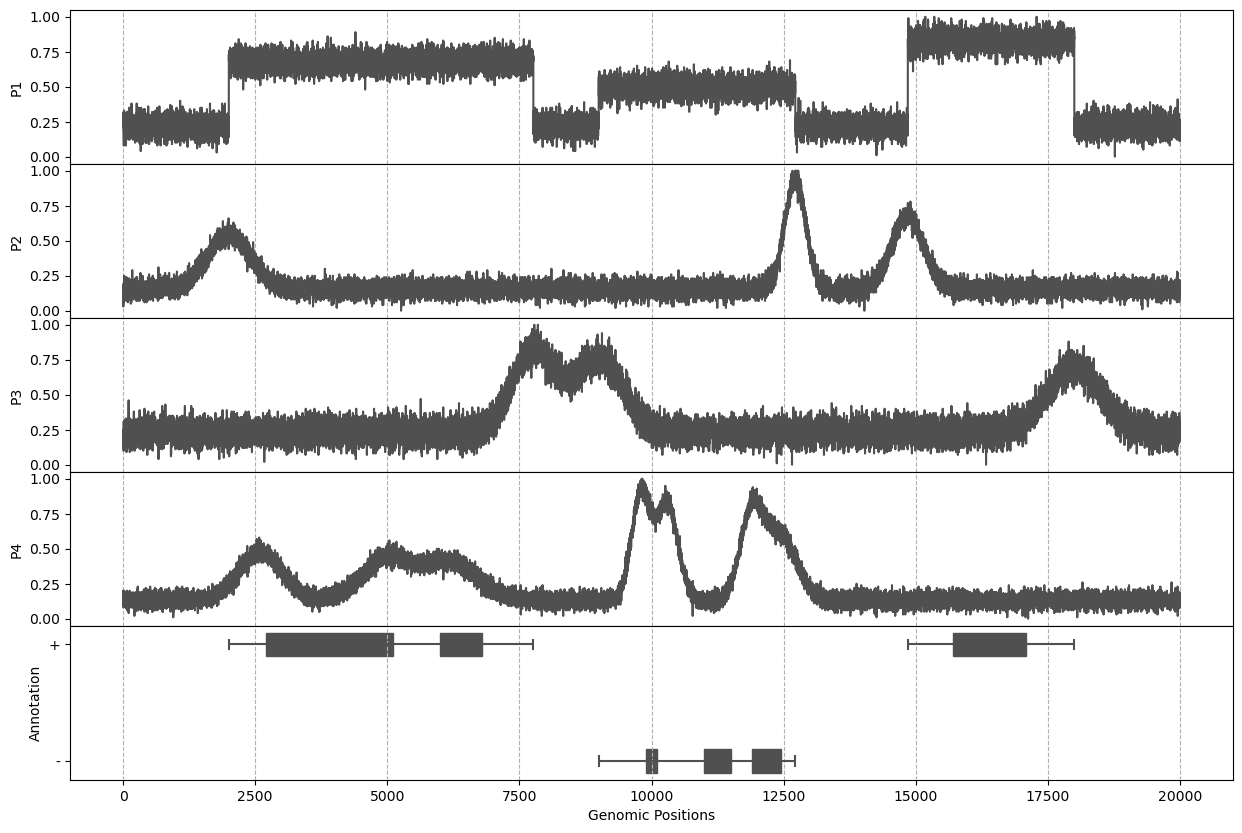

In [256]:
#to remove the warning for pandas
pd.options.mode.chained_assignment = None

#plotting for RNA binding proteins from P1 to P4
fig, axs = plt.subplots(5, 1, figsize=(15, 10), sharex=True)
fig.subplots_adjust(hspace=0)
axs[0].plot(rbp.P1, c= "#505050")
axs[0].set_yticks(np.arange(0,1.25,0.25))
axs[0].set_ylabel("P1")
axs[0].grid(True, which ='major', axis='x', linestyle='--')
axs[1].plot(rbp.P2, c= "#505050")
axs[1].set_yticks(np.arange(0,1.25,0.25))
axs[1].set_ylabel("P2")
axs[1].grid(True, which ='major', axis='x', linestyle='--')
axs[2].plot(rbp.P3, c= "#505050")
axs[2].set_yticks(np.arange(0,1.25,0.25))
axs[2].set_ylabel("P3")
axs[2].grid(True, which ='major', axis='x', linestyle='--')
axs[3].plot(rbp.P4, c= "#505050")
axs[3].set_yticks(np.arange(0,1.25,0.25))
axs[3].set_ylabel("P4")
axs[3].grid(True, which ='major', axis='x', linestyle='--')

#choosing the rows with exon type and creating a different column y where 
#strand value changed to 0 and 1 
exon_df = df[df['type'] == 'exon']
exon_df["y"] = np.where(exon_df['strand']=='+',1,0)
exon_df['width']= exon_df['stop']-exon_df['start']


#choosing the rows with transcript type and creating different column y to store strand value as 0 and 1
trans_df = df[df['type'] == 'transcript']
trans_df["y"] = np.where(trans_df['strand']=='+',1,0)


#plotting the horizontal lines for the transcript
axs[4].hlines(trans_df["y"].iloc[0], trans_df["start"].iloc[0], trans_df["stop"].iloc[0],color='#505050')
axs[4].hlines(trans_df["y"].iloc[1], trans_df["start"].iloc[1], trans_df["stop"].iloc[1],color='#505050')
axs[4].hlines(trans_df["y"].iloc[2], trans_df["start"].iloc[2], trans_df["stop"].iloc[2],color='#505050')

#plotting the vertical lines for ends of the transcript
axs[4].vlines(trans_df["start"].iloc[0], trans_df["y"].iloc[0]-0.05, trans_df["y"].iloc[0]+0.05,color='#505050')
axs[4].vlines(trans_df["stop"].iloc[0], trans_df["y"].iloc[0]-0.05, trans_df["y"].iloc[0]+0.05,color='#505050')
axs[4].vlines(trans_df["start"].iloc[1], trans_df["y"].iloc[1]-0.05, trans_df["y"].iloc[1]+0.05,color='#505050')
axs[4].vlines(trans_df["stop"].iloc[1], trans_df["y"].iloc[1]-0.05, trans_df["y"].iloc[1]+0.05,color='#505050')
axs[4].vlines(trans_df["start"].iloc[2], trans_df["y"].iloc[2]-0.05, trans_df["y"].iloc[2]+0.05,color='#505050')
axs[4].vlines(trans_df["stop"].iloc[2], trans_df["y"].iloc[2]-0.05, trans_df["y"].iloc[2]+0.05,color='#505050')


#using Rectangle patch for the denotion of exon
for i in range(len(exon_df)):
    rectangle= Rectangle((exon_df["start"].iloc[i],exon_df['y'].iloc[i]-0.2/2),width=exon_df["width"].iloc[i],height=0.2, facecolor="#505050", edgecolor="#505050")
    axs[4].add_patch(rectangle)
axs[4].grid(True, which ='major', axis='x', linestyle='--')
axs[4].set_yticks([0,1])
axs[4].set_yticklabels(["-", "+"])
axs[4].set_ylabel("Annotation")
axs[4].set_xlabel("Genomic Positions")

### Version 2

Text(0.5, 0, 'Genomic Positions')

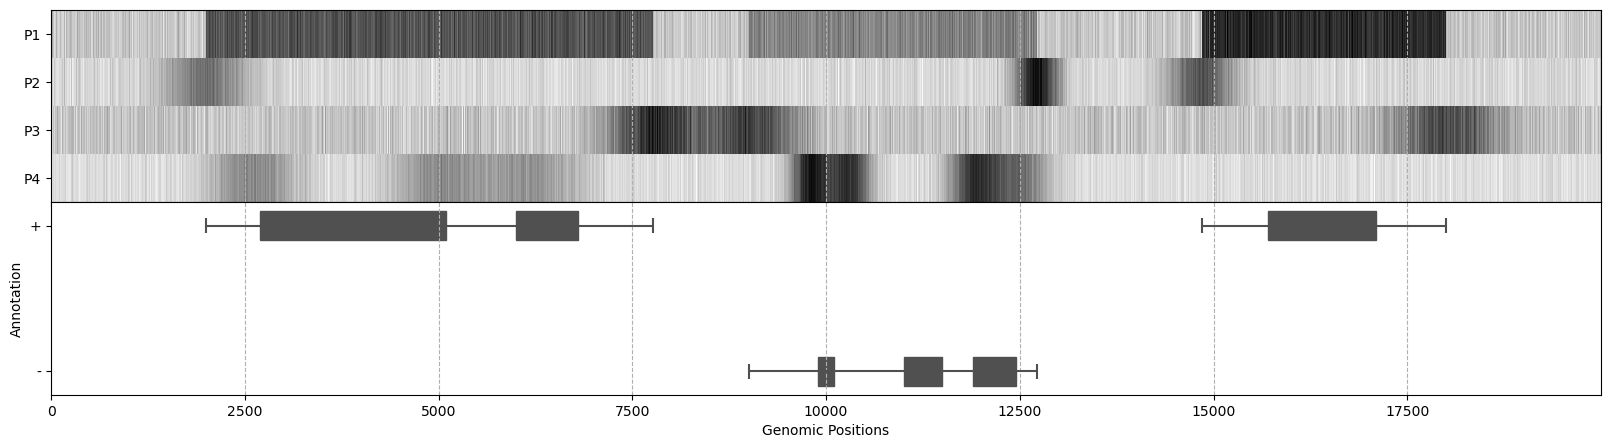

In [258]:
#creating 2 rows and 1 column for plotting
fig, axs = plt.subplots(2,1, sharex=True)
fig.set_size_inches(20,5)
#merging the two plots
fig.subplots_adjust(hspace=0)

#creating variables for the pcolormesh function
x = np.arange(0, len(rbp["P1"]))
y = np.arange(0, len(rbp.columns))
c = [rbp.P4, rbp.P3, rbp.P2, rbp.P1]

#plotting the 1st map with pcolormesh
axs[0].pcolormesh(x, y, c, shading = "nearest", cmap = "gray_r")
axs[0].set_yticks([0,1,2,3])
axs[0].set_yticklabels(["P4", "P3", "P2", "P1"])
axs[0].grid(True, which='major', axis='x', linestyle='--')


axs[1].hlines(trans_df["y"].iloc[0], trans_df["start"].iloc[0], trans_df["stop"].iloc[0],color='#505050')
axs[1].hlines(trans_df["y"].iloc[1], trans_df["start"].iloc[1], trans_df["stop"].iloc[1],color='#505050')
axs[1].hlines(trans_df["y"].iloc[2], trans_df["start"].iloc[2], trans_df["stop"].iloc[2],color='#505050')

axs[1].vlines(trans_df["start"].iloc[0], trans_df["y"].iloc[0]-0.05, trans_df["y"].iloc[0]+0.05,color='#505050')
axs[1].vlines(trans_df["stop"].iloc[0], trans_df["y"].iloc[0]-0.05, trans_df["y"].iloc[0]+0.05,color='#505050')
axs[1].vlines(trans_df["start"].iloc[1], trans_df["y"].iloc[1]-0.05, trans_df["y"].iloc[1]+0.05,color='#505050')
axs[1].vlines(trans_df["stop"].iloc[1], trans_df["y"].iloc[1]-0.05, trans_df["y"].iloc[1]+0.05,color='#505050')
axs[1].vlines(trans_df["start"].iloc[2], trans_df["y"].iloc[2]-0.05, trans_df["y"].iloc[2]+0.05,color='#505050')
axs[1].vlines(trans_df["stop"].iloc[2], trans_df["y"].iloc[2]-0.05, trans_df["y"].iloc[2]+0.05,color='#505050')


for i in range(len(exon_df)):
    rectangle= Rectangle((exon_df["start"].iloc[i],exon_df['y'].iloc[i]-0.2/2),width=exon_df["width"].iloc[i],height=0.2, facecolor="#505050", edgecolor="#505050")
    axs[1].add_patch(rectangle)
axs[1].grid(True, which ='major', axis='x', linestyle='--')
axs[1].set_yticks([0,1])
axs[1].set_yticklabels(["-", "+"])
axs[1].set_ylabel("Annotation")
axs[1].set_xlabel("Genomic Positions")


### Version 3

Text(0.5, 0, 'Genomic Positions')

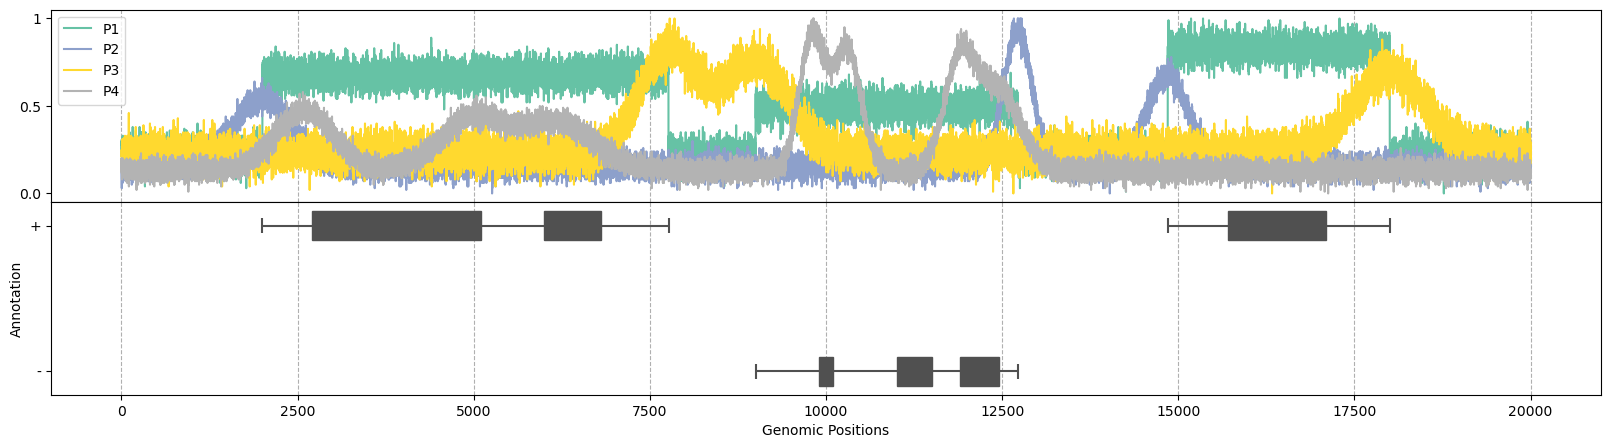

In [261]:
fig, axs = plt.subplots(2,1, sharex=True)
fig.set_size_inches(20,5)
fig.subplots_adjust(hspace=0)

#creating color list for storing colors
color= ["#66C2A5", "#8DA0CB", "#FFD92F", "#B3B3B3"]
#plotting all rna binding graphs in a single graph
axs[0].plot(rbp.P1, color=color[0], label="P1")
axs[0].plot(rbp.P2, color=color[1], label="P2")
axs[0].plot(rbp.P3, color=color[2], label="P3")
axs[0].plot(rbp.P4, color=color[3], label="P4")
axs[0].grid(True, which ='major', axis='x', linestyle='--')
axs[0].set_yticks(np.arange(0, 1.25, 0.5))
axs[0].set_yticklabels([0.0, 0.5, 1])
axs[0].legend(loc="upper left")



axs[1].hlines(trans_df["y"].iloc[0], trans_df["start"].iloc[0], trans_df["stop"].iloc[0],color='#505050', zorder=4)
axs[1].hlines(trans_df["y"].iloc[1], trans_df["start"].iloc[1], trans_df["stop"].iloc[1],color='#505050', zorder=4)
axs[1].hlines(trans_df["y"].iloc[2], trans_df["start"].iloc[2], trans_df["stop"].iloc[2],color='#505050', zorder=4)

axs[1].vlines(trans_df["start"].iloc[0], trans_df["y"].iloc[0]-0.05, trans_df["y"].iloc[0]+0.05,color='#505050')
axs[1].vlines(trans_df["stop"].iloc[0], trans_df["y"].iloc[0]-0.05, trans_df["y"].iloc[0]+0.05,color='#505050')
axs[1].vlines(trans_df["start"].iloc[1], trans_df["y"].iloc[1]-0.05, trans_df["y"].iloc[1]+0.05,color='#505050')
axs[1].vlines(trans_df["stop"].iloc[1], trans_df["y"].iloc[1]-0.05, trans_df["y"].iloc[1]+0.05,color='#505050')
axs[1].vlines(trans_df["start"].iloc[2], trans_df["y"].iloc[2]-0.05, trans_df["y"].iloc[2]+0.05,color='#505050')
axs[1].vlines(trans_df["stop"].iloc[2], trans_df["y"].iloc[2]-0.05, trans_df["y"].iloc[2]+0.05,color='#505050')


for i in range(len(exon_df)):
    rectangle= Rectangle((exon_df["start"].iloc[i],exon_df['y'].iloc[i]-0.2/2),width=exon_df["width"].iloc[i],height=0.2, facecolor="#505050", edgecolor="#505050", zorder=5)
    axs[1].add_patch(rectangle)
axs[1].grid(True, which ='major', axis='x', linestyle='--')
axs[1].set_yticks([0,1])
axs[1].set_yticklabels(["-", "+"])
axs[1].set_ylabel("Annotation")
axs[1].set_xlabel("Genomic Positions")

### Discussion

#### Pros and cons of different visualization methods
### Version 1:

Pros: 
Detailed and can be helpful in finding specific data points. The variation between trends can be easily observed.

Cons:
The comparison can be easier and more accurate if it had different colors for each plot. Too much information at once.

### Version 2:

Pros:
Useful for communicating information in a more intuitive manner. Trends visualized without being too compact. Pcolormesh is better at representing isolated extreme values.

Cons:
Information is cluttered and difficult to understand. Do not show the trends clearly.

### Version 3:

Pros:
Compact view of the earlier version 1. Makes easier to compare trends.

Cons:
Much less detailed that the previous one. Can be problem for colorblind people to visualize this graph.

### 2: Visualization Exercises

In this task, two additional plots shall be added to create a figure with multiple panels. Two additional datasets are provided:

10_project_data_scatter.csv contains the data needed to create the shown scatter plot

10_project_data_barplot.csv contains the data needed to create the shown bar plot

In [80]:
df1 = pd.read_csv("D:/LSI SEM II/Phillipp-Data Viz/10_project_data_scatter.csv")
df1

,x1,x2
0,8.41,5.43
1,9.56,3.92
2,10.83,1.80
3,11.14,2.32
4,11.41,1.41
...,...,...
1995,8.76,1.49
1996,9.89,4.09
1997,10.60,4.36
1998,10.83,2.96


In [81]:
df2 = pd.read_csv("D:/LSI SEM II/Phillipp-Data Viz/10_project_data_barplot.csv")
df2

,Unnamed: 0,condition_a_sample_1,condition_a_sample_2,control
0,XY,756,619,689
1,XZ,2411,2189,782
2,YX,577,821,689
3,YZ,743,781,719


Text(0.5, 0, 'Genomic Positions')

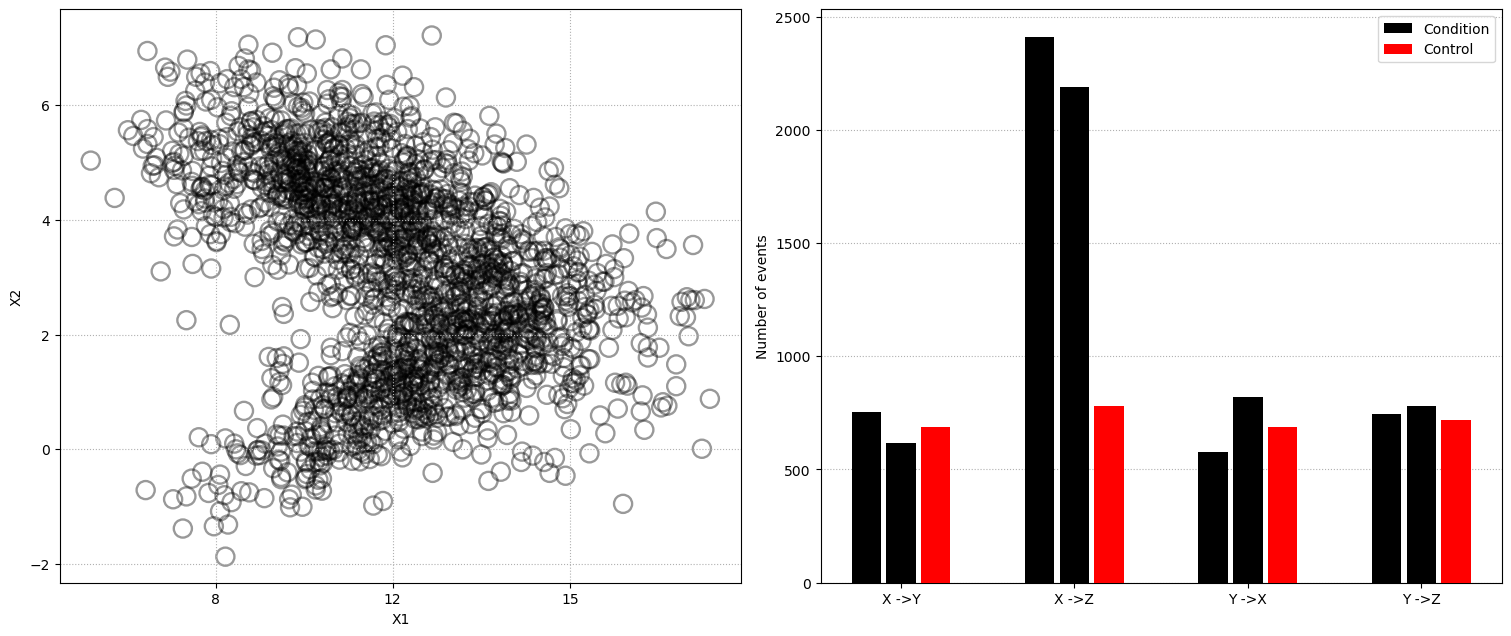

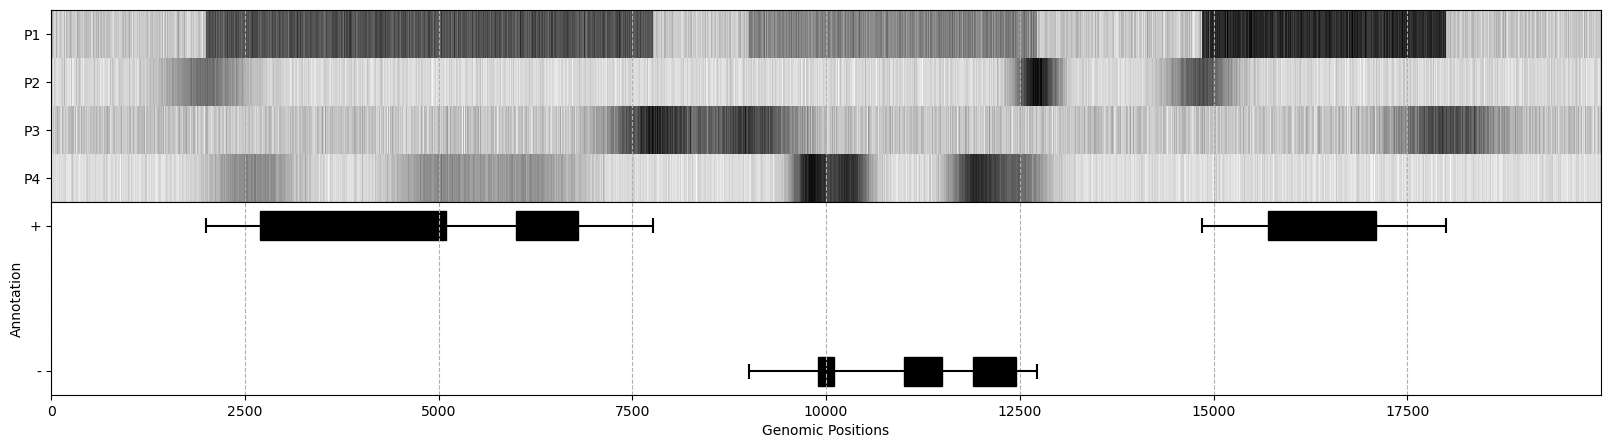

In [225]:
fig = plt.figure(constrained_layout = True)
fig.set_size_inches(15,12)

#creating the layout for the graphs
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

#plotting x1 and x2 with scatterplot
ax1.scatter(df1["x1"], df1["x2"], s= 170, facecolors="none", edgecolors="black", alpha=0.4, linewidth = 1.7)
ax1.set_xticks([8,10,12])
ax1.set_xticklabels([8,12,15])
ax1.set_xlabel("X1")
ax1.set_ylabel("X2")
ax1.grid(True, which ='major', linestyle='dotted', zorder=10)


x = np.arange(len(df2))  # the label locations
width = 0.17  # the width of the bars

#plotting the grouped bar plots
ax2.bar(x-0.2, df2["condition_a_sample_1"], width, color='black', zorder=7, label = "Condition")
ax2.bar(x, df2["condition_a_sample_2"], width, color='black', zorder=7)
ax2.bar(x+0.2, df2["control"], width, color='red', zorder=7, label = "Control")
ax2.set_xticks([0, 1, 2, 3])
ax2.set_xticklabels(['X ->Y', 'X ->Z', 'Y ->X', 'Y ->Z'])
ax2.set_ylabel("Number of events")
ax2.grid(True, which ='major', axis='y', linestyle='dotted', zorder=0)
ax2.legend()

#creating 2 rows and 1 column for plotting
fig, axs = plt.subplots(2,1, sharex=True)
fig.set_size_inches(20,5)
#merging the two plots
fig.subplots_adjust(hspace=0)

#creating variables for the pcolormesh function
x = np.arange(0, len(rbp["P1"]))
y = np.arange(0, len(rbp.columns))
c = [rbp.P4, rbp.P3, rbp.P2, rbp.P1]

#plotting the 1st map with pcolormesh
axs[0].pcolormesh(x, y, c, shading = "nearest", cmap = "gray_r")
axs[0].set_yticks([0,1,2,3])
axs[0].set_yticklabels(["P4", "P3", "P2", "P1"])
axs[0].grid(True, which='major', axis='x', linestyle='--')


axs[1].hlines(trans_df["y"].iloc[0], trans_df["start"].iloc[0], trans_df["stop"].iloc[0],color='black')
axs[1].hlines(trans_df["y"].iloc[1], trans_df["start"].iloc[1], trans_df["stop"].iloc[1],color='black')
axs[1].hlines(trans_df["y"].iloc[2], trans_df["start"].iloc[2], trans_df["stop"].iloc[2],color='black')

axs[1].vlines(trans_df["start"].iloc[0], trans_df["y"].iloc[0]-0.05, trans_df["y"].iloc[0]+0.05,color='black')
axs[1].vlines(trans_df["stop"].iloc[0], trans_df["y"].iloc[0]-0.05, trans_df["y"].iloc[0]+0.05,color='black')
axs[1].vlines(trans_df["start"].iloc[1], trans_df["y"].iloc[1]-0.05, trans_df["y"].iloc[1]+0.05,color='black')
axs[1].vlines(trans_df["stop"].iloc[1], trans_df["y"].iloc[1]-0.05, trans_df["y"].iloc[1]+0.05,color='black')
axs[1].vlines(trans_df["start"].iloc[2], trans_df["y"].iloc[2]-0.05, trans_df["y"].iloc[2]+0.05,color='black')
axs[1].vlines(trans_df["stop"].iloc[2], trans_df["y"].iloc[2]-0.05, trans_df["y"].iloc[2]+0.05,color='black')


for i in range(len(exon_df)):
    rectangle= Rectangle((exon_df["start"].iloc[i],exon_df['y'].iloc[i]-0.2/2),width=exon_df["width"].iloc[i],height=0.2, facecolor="black", edgecolor="black")
    axs[1].add_patch(rectangle)
axs[1].grid(True, which ='major', axis='x', linestyle='--')
axs[1].set_yticks([0,1])
axs[1].set_yticklabels(["-", "+"])
axs[1].set_ylabel("Annotation")
axs[1].set_xlabel("Genomic Positions")

### 3: 2-mer Counts In Sequence Data

The file 10_project_data_dna_sequences.txt consists of DNA sequences. Each line is a single DNA sequence. The figure shows that some k-mers are concentrated (occur more often) in some regions of the sequences. To recreate the figure you need to count the occurrences of a kmer at each position for all sequences.

Example: imagine to search for "xx" and "yy" in following sequences.

TCTAAGGxxyyG

xxCGTGGyyCGT

TTTxxACCGyyG

AGCxxACAACyy

TAxxCAAyyAGT

The counts for "xx" and "yy" would be the following:

[1 0 1 2 0 0 0 1 0 0 0 0]

[0 0 0 0 0 0 0 2 0 2 1 0]

In [252]:
#empty list for storing sequences
seqs = []

#to load the text file containing sequences and adding to the list
with open("D:/LSI SEM II/Phillipp-Data Viz/10_project_data_dna_sequences.txt") as file:
    for line in file:
        seqs.append(line.strip())
        

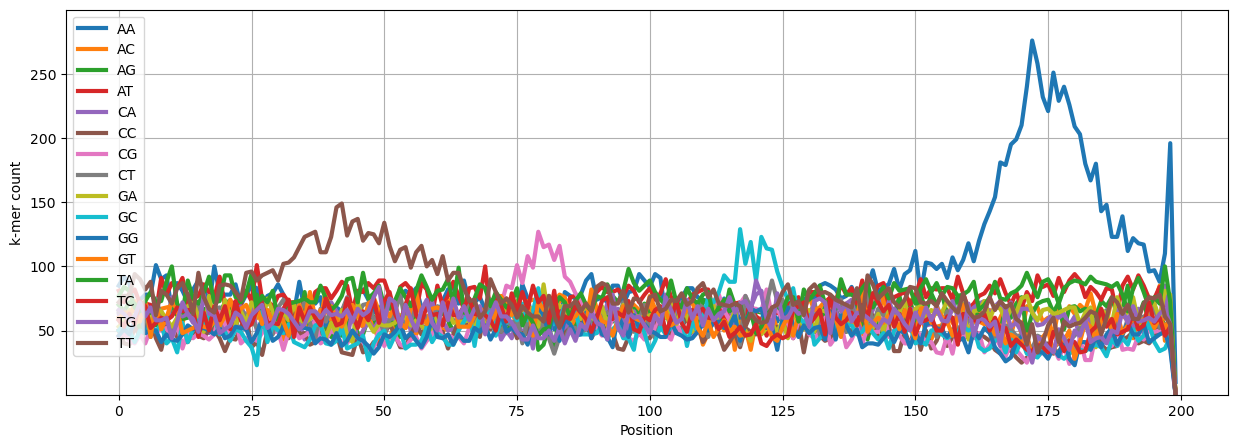

In [253]:
#storing the 2-mers in a list
kmers = ["AA", "AC", "AG", "AT", "CA", "CC", "CG", "CT", "GA", "GC", "GG", "GT", "TA", 
        "TC", "TG", "TT"]

#creating a dictionary to store kmer counts 
kmer_count_dict = {kmer: [0]* len(seqs[0]) for kmer in kmers}

#to get sequences from the sequence list to find the kmer pattern
for i in range(len(seqs)):
    seq = seqs[i]
    for j in range(len(seq)):
        kmer = seq[j: j + 2]
        if kmer in kmers:
            kmer_count_dict[kmer][j]+=1

#creating line plot and setting limit and size
fig, ax = plt.subplots()
ax.set_ylim(0, 300)
fig.set_size_inches(15,5)

##loop for drawing a line for each kmer
for kmer in kmers:
    ax.plot(kmer_count_dict[kmer], label=kmer, linewidth=3)
    
ax.set_yticks([50,100,150,200, 250])
ax.set_ylabel("k-mer count")
ax.set_xlabel("Position")
ax.legend(loc="upper left")
ax.grid()